# Data Analysis of Fact-Checking Dataset

This notebook analyzes the fact-checking dataset, including fact checks, posts, and pairs.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [35]:
df_facts = pd.read_csv('/content/drive/MyDrive/SemEval_Task7/processed_fact_checks.csv')

Total number of posts: 24431
Total language occurrences: 30802
Number of unique languages: 122
Posts with multiple languages: 8265 (33.83%)

Top 10 most common languages:
eng: 8713 (35.66%)
spa: 4578 (18.74%)
por: 3137 (12.84%)
fra: 1237 (5.06%)
msa: 871 (3.57%)
deu: 867 (3.55%)
ita: 855 (3.50%)
cat: 546 (2.23%)
ron: 516 (2.11%)
la: 510 (2.09%)

Top 5 language co-occurrences:
eng and spa: 1765
eng and por: 1195
spa and por: 974
eng and fra: 595
deu and eng: 393

Analysis complete. Details saved to 'language_analysis.txt' and chart saved as 'top_10_languages.png'.


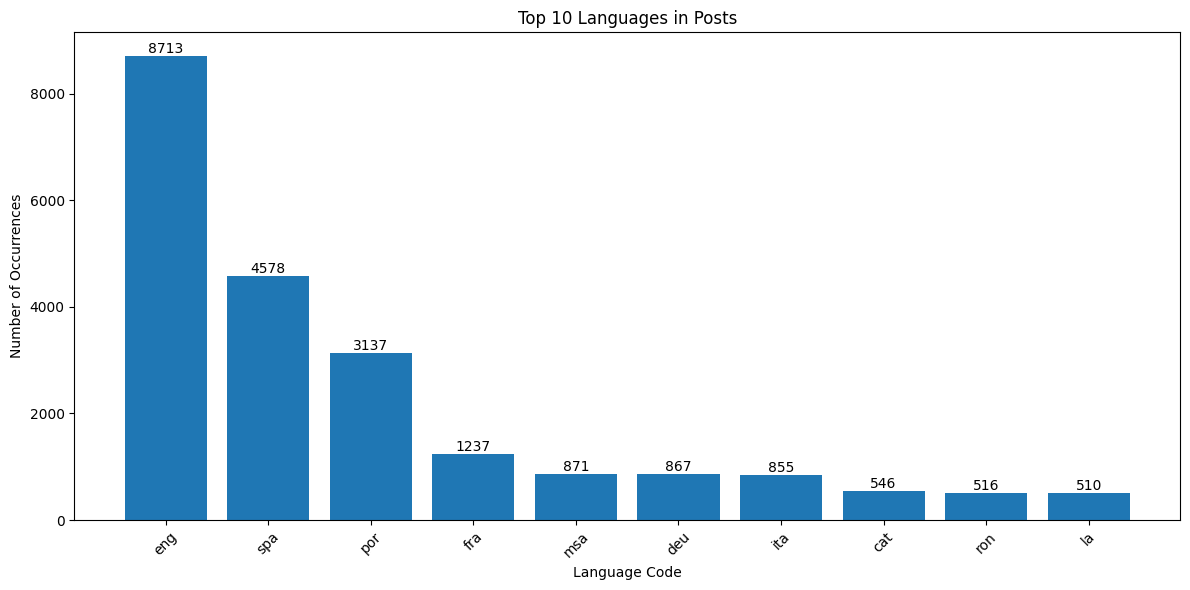

In [36]:
posts = pd.read_csv('/content/drive/MyDrive/SemEval_Task7/posts_with_language_codes.csv')

all_languages = [lang for langs in posts['languages'].apply(eval) for lang in langs]

language_counts = Counter(all_languages)

total_posts = len(posts)

total_languages = len(all_languages)
unique_languages = len(language_counts)
posts_with_multiple_languages = sum(len(langs) > 1 for langs in posts['languages'].apply(eval))

sorted_languages = sorted(language_counts.items(), key=lambda x: x[1], reverse=True)

print(f"Total number of posts: {total_posts}")
print(f"Total language occurrences: {total_languages}")
print(f"Number of unique languages: {unique_languages}")
print(f"Posts with multiple languages: {posts_with_multiple_languages} ({posts_with_multiple_languages/total_posts:.2%})")

print("\nTop 10 most common languages:")
for lang, count in sorted_languages[:10]:
    percentage = count / total_posts * 100
    print(f"{lang}: {count} ({percentage:.2f}%)")

# Plotting
plt.figure(figsize=(12, 6))
langs, counts = zip(*sorted_languages[:10])
plt.bar(langs, counts)
plt.title("Top 10 Languages in Posts")
plt.xlabel("Language Code")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=45)
for i, v in enumerate(counts):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.savefig('top_10_languages.png')

print("\nTop 5 language co-occurrences:")
co_occurrences = Counter()
for langs in posts['languages'].apply(eval):
    if len(langs) > 1:
        co_occurrences.update(frozenset(pair) for pair in zip(langs, langs[1:]))

for pair, count in co_occurrences.most_common(5):
    print(f"{' and '.join(pair)}: {count}")

with open('language_analysis.txt', 'w') as f:
    f.write(f"Total number of posts: {total_posts}\n")
    f.write(f"Total language occurrences: {total_languages}\n")
    f.write(f"Number of unique languages: {unique_languages}\n")
    f.write(f"Posts with multiple languages: {posts_with_multiple_languages} ({posts_with_multiple_languages/total_posts:.2%})\n\n")

    f.write("Language distribution:\n")
    for lang, count in sorted_languages:
        percentage = count / total_posts * 100
        f.write(f"{lang}: {count} ({percentage:.2f}%)\n")

    f.write("\nTop 10 language co-occurrences:\n")
    for pair, count in co_occurrences.most_common(10):
        f.write(f"{' and '.join(pair)}: {count}\n")

print("\nAnalysis complete. Details saved to 'language_analysis.txt' and chart saved as 'top_10_languages.png'.")

In [37]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Define the stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from a text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the function to the claim column
df_facts['claim_no_stopwords'] = df_facts['claim'].apply(remove_stopwords)

# Display the first few rows to verify
print(df_facts[['claim', 'claim_no_stopwords']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                             claim  \
0                       Are avocados good for you?   
1                      Can animals have headaches?   
2       Can we help prevent Alzheimer's with diet?   
3   Do any benefits of alcohol outweigh the risks?   
4             Does acupuncture work for headaches?   

                 claim_no_stopwords  
0                avocados good you?  
1                animals headaches?  
2    help prevent Alzheimer's diet?  
3  benefits alcohol outweigh risks?  
4       acupuncture work headaches?  


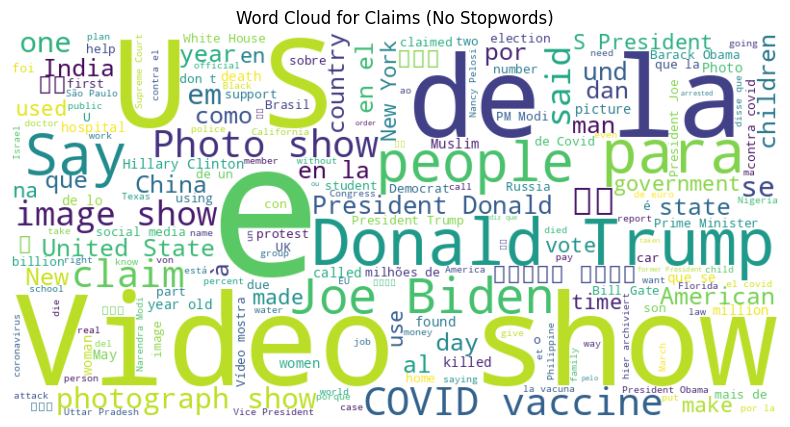

In [38]:
from wordcloud import WordCloud

# Combine all the text from the claim_no_stopwords column
text = ' '.join(df_facts['claim_no_stopwords'])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Claims (No Stopwords)')
plt.show()

In [39]:
# import torch
# from transformers import XLMTokenizer, XLMWithLMHeadModel

# tokenizer = XLMTokenizer.from_pretrained("FacebookAI/xlm-clm-enfr-1024")
# model = XLMWithLMHeadModel.from_pretrained("FacebookAI/xlm-clm-enfr-1024")

In [40]:
# import torch
# from transformers import AutoTokenizer, AutoModelForMaskedLM
# from sklearn.metrics.pairwise import cosine_similarity
# import numpy as np

# # Move model to GPU
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model.to(device)

# # Function to encode text into embeddings
# def encode_text(text, tokenizer, model):
#     inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
#     inputs = {key: value.to(device) for key, value in inputs.items()}  # Move inputs to GPU
#     with torch.no_grad():
#         outputs = model(**inputs)
#     return outputs.logits.mean(dim=1).squeeze().cpu().numpy()  # Move output to CPU

# smp_texts = posts['ocr'].tolist()
# fc_texts = df_facts['claim_no_stopwords'].tolist()

# # Encode SMP and FC texts
# smp_embeddings = np.array([encode_text(text, tokenizer, model) for text in smp_texts])
# fc_embeddings = np.array([encode_text(text, tokenizer, model) for text in fc_texts])

# # Compute cosine similarity between SMP and FC embeddings
# similarity_matrix = cosine_similarity(smp_embeddings, fc_embeddings)

# # Function to compute mean reciprocal rank (MRR)
# def mean_reciprocal_rank(similarity_matrix):
#     ranks = []
#     for i in range(similarity_matrix.shape[0]):
#         sorted_indices = np.argsort(-similarity_matrix[i])
#         rank = np.where(sorted_indices == i)[0][0] + 1
#         ranks.append(1 / rank)
#     return np.mean(ranks)

# # Function to compute success @ K
# def success_at_k(similarity_matrix, k):
#     success = 0
#     for i in range(similarity_matrix.shape[0]):
#         sorted_indices = np.argsort(-similarity_matrix[i])
#         if i in sorted_indices[:k]:
#             success += 1
#     return success / similarity_matrix.shape[0]

# # Compute MRR and success @ K
# mrr = mean_reciprocal_rank(similarity_matrix)
# success_k = success_at_k(similarity_matrix, k=3)

# print(f"Mean Reciprocal Rank (MRR): {mrr}")
# print(f"Success @ K (K=3): {success_k}")

In [41]:
!pip install fasttext

In [42]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
import fasttext
import fasttext.util
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from collections import defaultdict
import gc
from tqdm import tqdm
import scipy.sparse as sp
from scipy.sparse import lil_matrix

class MultilingualRetrieval:
    def __init__(self, model_type='tfidf', batch_size=1000):
        self.model_type = model_type
        self.batch_size = batch_size

        if model_type == 'tfidf':
            self.vectorizer = TfidfVectorizer(
                analyzer='char_wb',
                ngram_range=(2, 4),
                min_df=5,
                max_features=10000,
                dtype=np.float32
            )
        elif model_type == 'fasttext':
            fasttext.util.download_model('en', if_exists='ignore')
            self.ft = fasttext.load_model('cc.en.300.bin')
        else:  # doc2vec
            self.model = None

    def preprocess_text(self, text):
        if isinstance(text, tuple):
            return str(text[1] if len(text) > 1 else text[0]).lower().strip()
        return str(text).lower().strip()

    def process_in_batches(self, texts, process_func):
        results = []
        for i in tqdm(range(0, len(texts), self.batch_size)):
            batch = texts[i:i + self.batch_size]
            batch_result = process_func(batch)
            results.append(batch_result)
            gc.collect()

        if self.model_type == 'tfidf':
            return sp.vstack(results)
        return np.vstack(results)

    def fit_transform(self, texts):
        if self.model_type == 'tfidf':
            processed_texts = [self.preprocess_text(text) for text in texts]
            return self.vectorizer.fit_transform(processed_texts)

        elif self.model_type == 'fasttext':
            def process_batch(batch):
                return np.vstack([
                    np.mean([self.ft.get_word_vector(word)
                            for word in word_tokenize(self.preprocess_text(text))
                            if word.strip()], axis=0)
                    for text in batch
                ])
            return self.process_in_batches(texts, process_batch)

        else:  # doc2vec
            processed_texts = [self.preprocess_text(text) for text in texts]
            tagged_data = [TaggedDocument(words=text.split(), tags=[str(i)])
                          for i, text in enumerate(processed_texts)]
            self.model = Doc2Vec(vector_size=300, min_count=2, epochs=20)
            self.model.build_vocab(tagged_data)
            self.model.train(tagged_data, total_examples=self.model.corpus_count,
                           epochs=self.model.epochs)
            return np.vstack([self.model.infer_vector(text.split())
                            for text in processed_texts])

    def transform(self, texts):
        """Transform new texts using the fitted model"""
        if self.model_type == 'tfidf':
            processed_texts = [self.preprocess_text(text) for text in texts]
            return self.vectorizer.transform(processed_texts)

        elif self.model_type == 'fasttext':
            def process_batch(batch):
                return np.vstack([
                    np.mean([self.ft.get_word_vector(word)
                            for word in word_tokenize(self.preprocess_text(text))
                            if word.strip()], axis=0)
                    for text in batch
                ])
            return self.process_in_batches(texts, process_batch)

        else:  # doc2vec
            processed_texts = [self.preprocess_text(text) for text in texts]
            return np.vstack([self.model.infer_vector(text.split())
                            for text in processed_texts])

    def compute_top_k_similarities(self, query_vectors, doc_vectors, k=100, batch_size=500):

        n_queries = query_vectors.shape[0]
        n_docs = doc_vectors.shape[0]

        # Adjust k to be no larger than the total number of documents
        k = min(k, n_docs)

        # Pre-allocate sparse matrix for top-k similarities
        similarities = lil_matrix((n_queries, n_docs), dtype=np.float32)

        for i in range(0, n_queries, batch_size):
            batch_queries = query_vectors[i:i + batch_size]
            batch_sims = batch_queries.dot(doc_vectors.T)

            # Find top-k similarities for each query
            for j, row_sims in enumerate(batch_sims):
                # Convert to dense array to use argpartition
                row_sims_dense = row_sims.toarray().ravel()

                # Get indices of top-k similarities
                top_k_indices = np.argpartition(row_sims_dense, -k)[-k:]

                # Store top-k similarities
                similarities[i+j, top_k_indices] = row_sims_dense[top_k_indices]

        return similarities.tocsr()

In [43]:
smp_texts = posts['ocr'].tolist()
fc_texts = df_facts['claim_no_stopwords'].tolist()

In [44]:
from sklearn.model_selection import train_test_split

# Split only the social media posts
smp_train, smp_val = train_test_split(
    smp_texts,
    test_size=0.2,
    random_state=42
)

# Keep all fact checks for both train and validation
fc_texts_full = fc_texts  # Use the complete fact-check database

print(f"Training queries: {len(smp_train)}")
print(f"Validation queries: {len(smp_val)}")
print(f"Fact-check database size: {len(fc_texts_full)}")

# Modified training approach
def train_and_evaluate():
    retriever = MultilingualRetrieval(model_type='tfidf', batch_size=500)

    # First, vectorize the entire fact-check database
    print("Vectorizing fact-check database...")
    fc_vectors = retriever.fit_transform(fc_texts_full)

    # Process training queries
    print("Processing training queries...")
    smp_train_vectors = retriever.transform(smp_train)
    train_similarities = retriever.compute_top_k_similarities(
        smp_train_vectors,
        fc_vectors,
        batch_size=500
    )
    train_mrr, train_success_10 = evaluate_retrieval(train_similarities, k=10)

    # Process validation queries
    print("Processing validation queries...")
    smp_val_vectors = retriever.transform(smp_val)
    val_similarities = retriever.compute_top_k_similarities(
        smp_val_vectors,
        fc_vectors,
        batch_size=500
    )
    val_mrr, val_success_10 = evaluate_retrieval(val_similarities, k=10)

    print("\nResults:")
    print(f"Training - MRR: {train_mrr:.4f}, Success@10: {train_success_10:.4f}")
    print(f"Validation - MRR: {val_mrr:.4f}, Success@10: {val_success_10:.4f}")

# We also need to modify the evaluate_retrieval function to handle the fact that
# we don't have one-to-one correspondence between queries and documents
def evaluate_retrieval(similarity_matrix, k=10, relevant_docs=None):
    """
    Evaluate retrieval performance

    Parameters:
    - similarity_matrix: Matrix of similarities between queries and documents
    - k: cutoff for Success@k
    - relevant_docs: Optional mapping of query_idx -> list of relevant doc_idx
                    If None, assumes diagonal is relevant (for training)
    """
    mrr = 0
    success_k = 0
    n_queries = similarity_matrix.shape[0]

    for i in range(n_queries):
        # Get sorted indices in descending order
        ranked_indices = np.argsort(-similarity_matrix[i])

        # Get relevant documents for this query
        if relevant_docs is None:
            # During training, assume the corresponding fact-check is relevant
            relevant = {i}
        else:
            relevant = set(relevant_docs[i])

        # Find the rank of the first relevant document
        for rank, idx in enumerate(ranked_indices[:k], 1):
            if idx in relevant:
                mrr += 1.0 / rank
                success_k += 1
                break

    mrr = mrr / n_queries
    success_k = success_k / n_queries

    return mrr, success_k

Training queries: 19544
Validation queries: 4887
Fact-check database size: 153743


In [45]:
# If you have a mapping file
mapping_df = pd.read_csv('/content/drive/MyDrive/SemEval_Task7/pairs.csv')

import numpy as np
from sklearn.model_selection import train_test_split
from collections import defaultdict
import scipy.sparse as sp

# First, create ID mappings
def create_id_mappings(posts_df, fc_df):
    post_id_to_idx = {id_: idx for idx, id_ in enumerate(posts_df['post_id'])}
    fc_id_to_idx = {id_: idx for idx, id_ in enumerate(fc_df['fact_check_id'])}
    return post_id_to_idx, fc_id_to_idx

# Create mappings of relevant documents
def create_relevance_mappings(mapping_df, post_id_to_idx, fc_id_to_idx):
    relevant_docs = defaultdict(list)
    for _, row in mapping_df.iterrows():
        if row['post_id'] in post_id_to_idx and row['fact_check_id'] in fc_id_to_idx:
            post_idx = post_id_to_idx[row['post_id']]
            fc_idx = fc_id_to_idx[row['fact_check_id']]
            relevant_docs[post_idx].append(fc_idx)
    return relevant_docs

def train_and_evaluate_retrieval():
    # Create ID mappings
    post_id_to_idx, fc_id_to_idx = create_id_mappings(posts, df_facts)

    # Split social media posts into train/val
    smp_train_idx, smp_val_idx = train_test_split(
        range(len(smp_texts)),
        test_size=0.2,
        random_state=42
    )

    # Create train/val sets
    smp_train = [smp_texts[i] for i in smp_train_idx]
    smp_val = [smp_texts[i] for i in smp_val_idx]

    print(f"Training queries: {len(smp_train)}")
    print(f"Validation queries: {len(smp_val)}")
    print(f"Fact-check database size: {len(fc_texts)}")

    # Initialize retriever
    retriever = MultilingualRetrieval(model_type='tfidf', batch_size=500)

    # Process fact-checks (this is our document database)
    print("Vectorizing fact-check database...")
    fc_vectors = retriever.fit_transform(fc_texts)
    save_sparse_matrix('fc_vectors.npz', fc_vectors)

    # Process training queries
    print("Processing training queries...")
    smp_train_vectors = retriever.transform(smp_train)
    train_similarities = retriever.compute_top_k_similarities(
        smp_train_vectors,
        fc_vectors,
        batch_size=500
    )
    save_sparse_matrix('train_similarities.npz', train_similarities)

    # Process validation queries
    print("Processing validation queries...")
    smp_val_vectors = retriever.transform(smp_val)
    val_similarities = retriever.compute_top_k_similarities(
        smp_val_vectors,
        fc_vectors,
        batch_size=500
    )
    save_sparse_matrix('val_similarities.npz', val_similarities)

    # Create relevance mappings for evaluation
    if 'mapping_df' in globals():  # If you have the mapping file
        relevant_docs = create_relevance_mappings(
            mapping_df,
            post_id_to_idx,
            fc_id_to_idx
        )
    else:
        relevant_docs = None

    # Evaluate
    train_mrr, train_success_10 = evaluate_retrieval(
        train_similarities,
        k=10,
        relevant_docs=relevant_docs
    )

    val_mrr, val_success_10 = evaluate_retrieval(
        val_similarities,
        k=10,
        relevant_docs=relevant_docs
    )

    print("\nResults:")
    print(f"Training - MRR: {train_mrr:.4f}, Success@10: {train_success_10:.4f}")
    print(f"Validation - MRR: {val_mrr:.4f}, Success@10: {val_success_10:.4f}")

    return {
        'train_mrr': train_mrr,
        'train_success_10': train_success_10,
        'val_mrr': val_mrr,
        'val_success_10': val_success_10
    }

# Helper functions for saving/loading sparse matrices
def save_sparse_matrix(filename, matrix):
    if isinstance(matrix, sp.spmatrix):
        np.savez(filename,
                 data=matrix.data,
                 indices=matrix.indices,
                 indptr=matrix.indptr,
                 shape=matrix.shape)
    else:
        np.save(filename, matrix)

def load_sparse_matrix(filename):
    if filename.endswith('.npz'):
        loader = np.load(filename)
        return sp.csr_matrix((loader['data'],
                            loader['indices'],
                            loader['indptr']),
                           shape=loader['shape'])
    else:
        return np.load(filename)

# Run the training and evaluation
if __name__ == "__main__":
    # Load your data first
    mapping_df = pd.read_csv('/content/drive/MyDrive/SemEval_Task7/pairs.csv')

    results = train_and_evaluate_retrieval()

Training queries: 19544
Validation queries: 4887
Fact-check database size: 153743
Vectorizing fact-check database...
Processing training queries...
Processing validation queries...

Results:
Training - MRR: 0.0000, Success@10: 0.0000
Validation - MRR: 0.0000, Success@10: 0.0000
